## Machine Learning: now with with data
---
* In today's workshop, we shall work with an actual dataset.
* We will be developing a machine learning model for classifying tumors as either malignant or benign
* In the process, we will explore ML ideas such as Binary Classification, Feature Selection, Model Evaluation.
* Additionally, we will explore ways of using different ML algorithms to solve this problem.
* Specifically, we will explore Logistic Regression, K-Means Clustering
* We'll then give a `motivation` for why Deep Learning is such a consequential development in ML

### Prologue
***
* We bring the essential Data and Numerical Computing Libraries into Scope.
* These include:
> * Numpy for Linear Algebra i.e working with Matrices. 
> * Pandas for handling labeled tabular data (as we'll be doing)
> * Scikit learn (sklearn) for generic machine learning algorithms and other good things

* If any of these libraries are not already installed on your system, you can `pip install` them. (Another Option is to install Anaconda, but ...)

In [2]:
# Basic.
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn import linear_model
from sklearn import neighbors
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Misc
from collections import Counter

* Read the data. Here Pandas displays its beauty.
* Without Pandas, we'd have had to read the data file one line at a time and parse it manually. A laborious process that is not only error prone (memory leaks from unclosed files, anyone?) but also inefficient (pandas is more optimized than any I/O code we can craft)
* Just for completeness, we could have loaded the file directly into a `numpy array` by calling `np.genfromtext('./data,csv', ..., delimeter=',')` but then we wouldn't be able to get the glorious table that you are about to see.


- *** Oh, and the data was downloaded from [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data)***

In [3]:
data = pd.read_csv('./data.csv')
data.drop('Unnamed: 32', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)

In [4]:
data.sample(n=10, random_state=42)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.14260,0.2378,0.2671,0.10150,0.3014,0.08750
70,M,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.11930,0.2336,0.2687,0.17890,0.2551,0.06589
131,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
431,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.14500,0.2629,0.2403,0.07370,0.2556,0.09359
540,B,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.13450,0.2118,0.1797,0.06918,0.2329,0.08134
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.74,39.42,184.60,1821.0,0.16500,0.8681,0.9387,0.26500,0.4087,0.12400
369,M,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,...,27.66,25.80,195.00,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574
29,M,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,...,20.01,19.52,134.90,1227.0,0.12550,0.2812,0.2489,0.14560,0.2756,0.07919
81,B,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,...,15.53,23.19,96.66,614.9,0.15360,0.4791,0.4858,0.17080,0.3527,0.10160
477,B,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,...,15.14,21.80,101.20,718.9,0.09384,0.2006,0.1384,0.06222,0.2679,0.07698


In [5]:
data.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

(-0.01, 0.5)

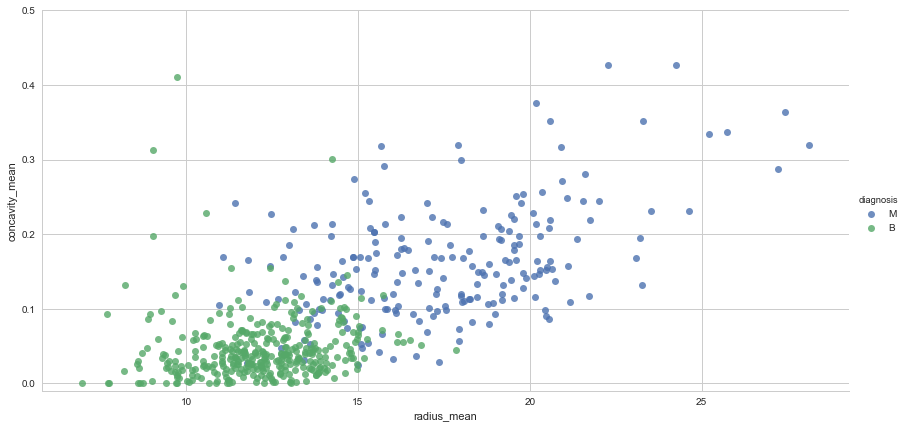

In [6]:
"""
Just a little bit about Exploratory Data Analysis (EDA)
"""
sns.set_style('whitegrid')
sns.lmplot(x='radius_mean', y='concavity_mean', 
           data=data, fit_reg=False, hue='diagnosis',
           size=6, aspect=2
)
plt.ylim(-0.01, 0.5)

### Supervised Learning: a very short rant.
---
* We want to find a feature vector $\theta$ and a bias term `b`. To see why this makes sense, rememeber the familiar, unassuming equation for a line: $$f(x) = mx + b$$ where `m` is the slope and `b` is the intercept. Notice that once we find these two __parameters__, given a new value of $x$ we can confidently predict its $y = f(x)$ value.
* This, observation is the foundation of a class of Supervised Learning techniques called ***Parametric methods.*** 
* Remember, Supervised Learning refers to ML algorithms that require labeled data. 

* We generalize this idea in the eqn below: $$f(x) = y = \theta^Tx + b$$ The uncanny similarity between this and the previous eqn is obvious. We still want to predict $y \in \{-1, 1\}$, $x$,  $b$, and $\theta$ all $ \in \mathbb{R}^n$ and we use the dot product which generalizes multiplication to higher dimensions. This is  the first of three key building blocks of any (all?) Supervised Learning algorthms, (The other 2 being Loss Function Specification and Optimization on the Loss Function).

In [7]:
'''
Remember y = $\theta^Tx + b
we want to find theta and b. Y and X come from our training data.
So let's set that up.
'''
Y = np.array([1 if v == 'M' else 0 for v in data['diagnosis']])

In [8]:
X = data.drop('diagnosis', axis=1).values
X.shape

(569, 30)

#### Training Sets, Development Sets, Validation Sets
* To know how well our our models are doing on our data, we'll need to test them
<img src="./train_test.png" alt="Train, Test, Dev Split" title="A picture is worth 250 words" style="width: 600px;"/>

Scikit Learn has a function that does that for us.

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30
)

In [10]:
print X_train.shape, Y_train.shape
print X_test.shape, Y_test.shape

(398, 30) (398,)
(171, 30) (171,)


### The stage has been set.
* We have labelled data, which we have split into train and test sets.
* We want to use the test data $X_{test}$ and $Y_{test}$ to __learn__ parameters ($\theta$ and $b$) of a function that maps $X \rightarrow Y$

### 1. Logistic Regression
##### a. Representation
* Consider a single training example $\{x^{(i)}, y^{(i)}\}$ notice that, the function $y^{(i)}\theta^Tx^{(i)}$ is always positive, i.e $ y^{(i)}\theta^Tx^{(i)} > 0$   if we classify this example correctly. Remember, $\theta^Tx^{(i)}$ is our prediction for what $y^{(i)}$ is, (where we include the bias term $b$ inside the feature vector for convenience).

##### b. Loss Function
* We optimize (Minimize or Maximize – mostly minimize) Loss functions.
* Logistic regression uses the logistic loss function $$g(y^{(i)}\theta^Tx^{(i)}) = log(1 + exp[-y^{(i)}\theta^Tx^{(i)}])$$
* Logistic regression is basically choosing $\theta$ that minimizes $$ J(\theta) = \dfrac{1}{m}\sum_{i=1}^{m} log(1 + exp[-y^{(i)}\theta^Tx^{(i)}])$$

* We are hoping that minimizing the average logistic loss accross all $m$ training examples will produce $\theta$ such that $ y^{(i)}\theta^Tx^{(i)} > 0$ for all (or almost all) training examples.

##### c. Optimization
* Optimization, as you know from calculus, involves taking derivatives and finding points at which the derivatives equal to 0. We can do that with the logistic function, but we won't get into that. (Take 229!)
* We fit (find the parameters $\theta$) the model using Gradient Descent. GD is an iterative optimization algorithm that takes the derivative with respect to the current values of $\theta$ and `moves` in the direction of that derivative i.e direction of steepest descent. We hope that, by iteratively moving down the slope, we'll eventually reach the lowest point.

>> The discussion above uses $y \in \{-1, 1\}$ yet our implementaion below uses $y \in \{0, 1\}$, this is only a mathematical difference and does not change the model.

In [11]:
'''
Back to Breast Cancer.
sklearn.linear_model houses linear_models 
'''
log_regression = linear_model.LogisticRegression()
log_regression.fit(X_train, Y_train)
model_one_score = log_regression.score(X_test, Y_test)
print "Classification Accuracy on the Test Set is " + str(model_one_score * 100) + " Percent"

theta = log_regression.coef_[0]
b = log_regression.intercept_[0]
print theta
print b

Classification Accuracy on the Test Set is 93.567251462 Percent
[ -1.87883115e+00  -9.28490508e-02   1.54854572e-03  -3.15908577e-03
   1.22891541e-01   3.70563919e-01   5.38478883e-01   2.74557244e-01
   1.54753875e-01   3.21525656e-02   1.32048402e-02  -7.17826449e-01
  -4.74954237e-01   1.40137166e-01   6.95148681e-03   3.35892931e-02
   3.93346414e-02   2.59224686e-02   3.63190760e-02   3.06146136e-03
  -1.13033125e+00   3.44942918e-01   1.21535580e-01   2.86290777e-02
   2.06297404e-01   1.13927271e+00   1.44355345e+00   4.84501559e-01
   5.71481736e-01   1.32812909e-01]
-0.365390748623


##### Take-aways and Additional thoughts
* We used Logistic Regression to find the parameters $\theta$ and $b$ Together, these two define a hyperplane separating the tumors into either Malignant or Benign.
* Classification Accuracy on the test set was $95.3216374269 \%$ 
* Model Representation $\rightarrow$ Loss Function  $\rightarrow$ Optimizing the Loss Function.
* Train - Test - Split. (Model Validation)
* Feature Selection.
* Regularization -- Logistic Regression is always regularized.

### 3. K-Means
1. Remember K-Means is an example of an unsurpervised learning algorithm. In short, we do not need $Y_{train}$ We (as in we puny humans, not the algorithm), however need $Y_{test}$ for testing.
2. Instead of trying to find a separating hyperplane, k-Means attempts to group our training data into k groups, each defined by their cluster center, aka the centroid.
3. Then, given a new example $x$ we calculate the distance from $x$ to all the centroids and assign $x$ to the class whose centroid is closest to $x$

K-Means Procedure.
> * You are given a list of N vectors $x_1, ..., x_N$ and an initial list random k centroids $z_1, ...., z_k$
>* Repeat the following untill convergence:
>> * Partition the vectors into k groups, such that each vector $x_i$ is placed inside the same group as the centroid closest to it.
>> * Update the centroids. for each of the clusters that we've created from the first step, the new centroid is updated to be the mean of the vectors in that cluster.

Pseudo-Code.
```python
def K_Means(vectors, centroids):
    clusters = []
    while True:
        if we_have_reached_convergence(): break
        for vector in vectors:
            closest_centroid = find_closest_centroid(
                                   vector, centroids
                              )
            assign_vector_to_nearest_centroid(clusters, closest_centroid)
        for cluster in clusters:
            new_cluster_center = np.mean(cluster)
    return clusters
```

Text(0.5,16,u'Predicted label')

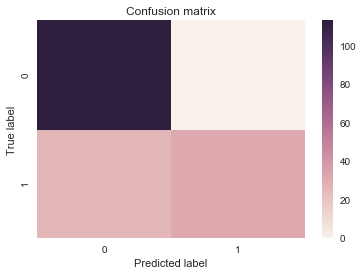

In [12]:
'''
Back To Cancer.
We now use K-Means to solve the cancer classification problem.
'''
kmeans = cluster.KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X_train)
prediction = kmeans.predict(X_test)

cm = confusion_matrix(Y_test, prediction)
sns.set_style("whitegrid")
sns.heatmap(cm)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### neural networks.
---
<img src="./morty.jpg" alt="NN" title="A picture is worth 250 words" style="width: 300px;"/>
* Oh geez!, where do I find enough bored oncologists to extract features from tumor samples so that I can create a training dataset? Oh geez!
* Neural Networks, the centerpiece of Deep Learning $\blacksquare$

> ___To be continued___